In [2]:
%run './model/multi_corpus.py'
%run './constants.py'

from matplotlib import cm

In [3]:
corpora = citation_graphs()
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies DiGraph with 2224 nodes and 4332 edges
Geometry DiGraph with 2314 nodes and 2995 edges
Geophysics DiGraph with 38952 nodes and 162177 edges
Economics DiGraph with 7147 nodes and 55537 edges
Language & Linguistics DiGraph with 3128 nodes and 13572 edges
Probability & Statistics DiGraph with 5496 nodes and 19273 edges
Material Engineering DiGraph with 39045 nodes and 253189 edges
Artificial Intelligence DiGraph with 5475 nodes and 21705 edges
Sociology DiGraph with 4083 nodes and 25676 edges
International Business DiGraph with 5254 nodes and 36786 edges
Political Science DiGraph with 5305 nodes and 26335 edges
Genetics & Genomics DiGraph with 26776 nodes and 109991 edges
Immunology DiGraph with 27301 nodes and 195148 edges
Human Resources & Organizations DiGraph with 5848 nodes and 34965 edges
Ethnic & Cultural Studies DiGraph with 2105 nodes and 4041 edges
Neurology DiGraph with 32881 nodes and 282230 edges


# Generational Growth

Gender Studies


/var/folders/rz/n4jmlyh1355cy_wkn5gd00x40000gn/T/ipykernel_67209/136757711.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


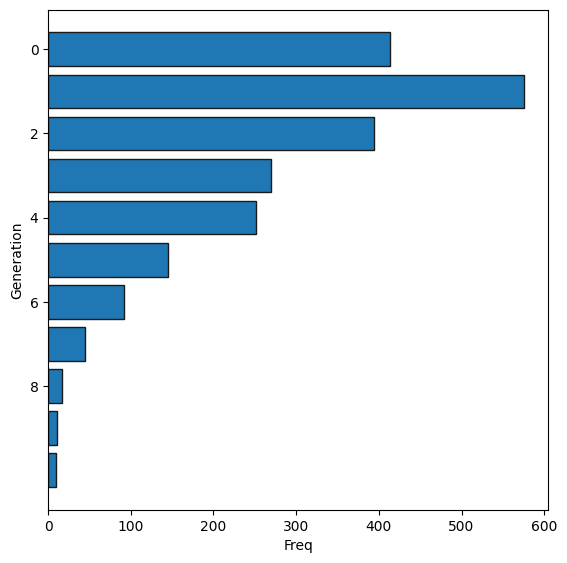

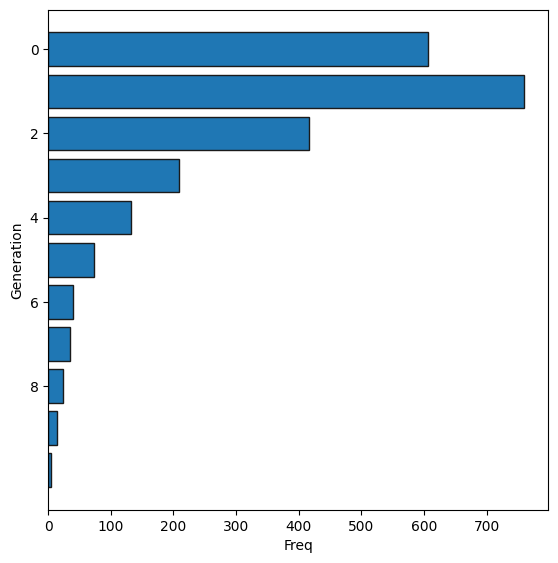

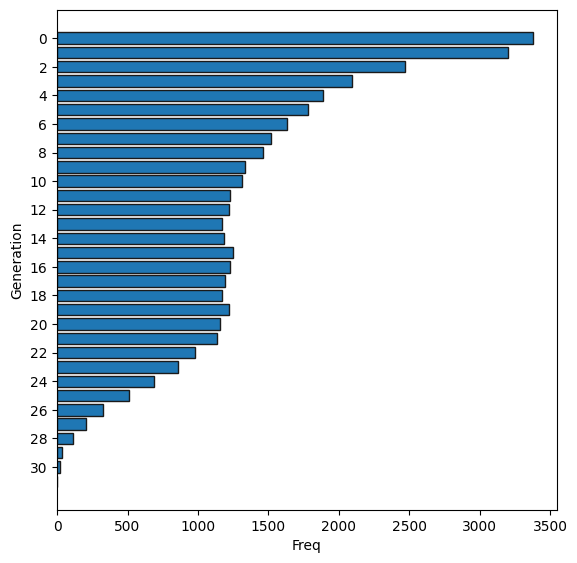

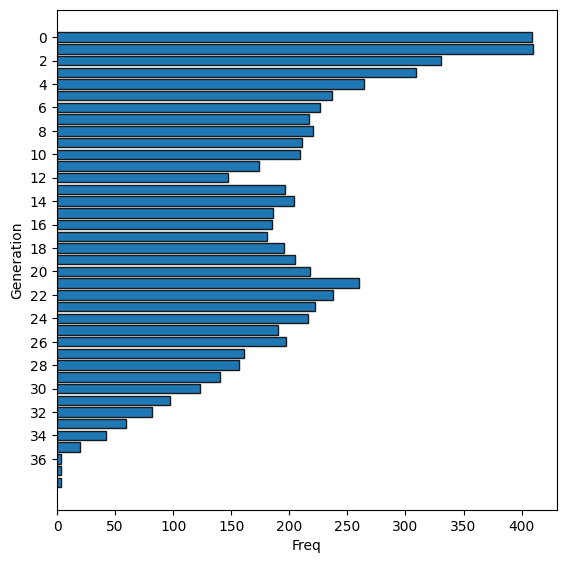

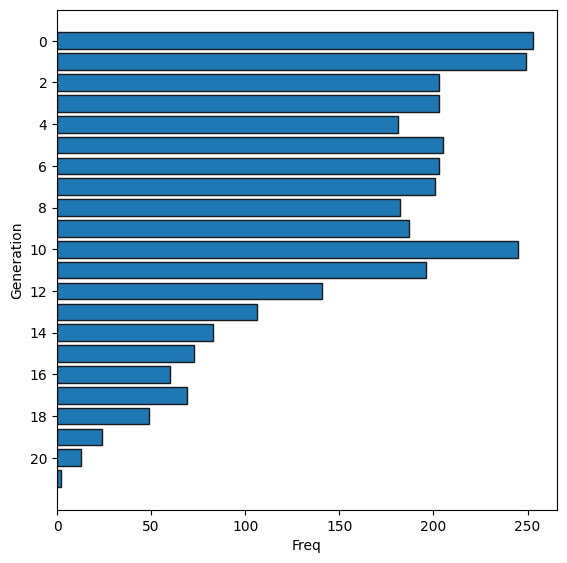

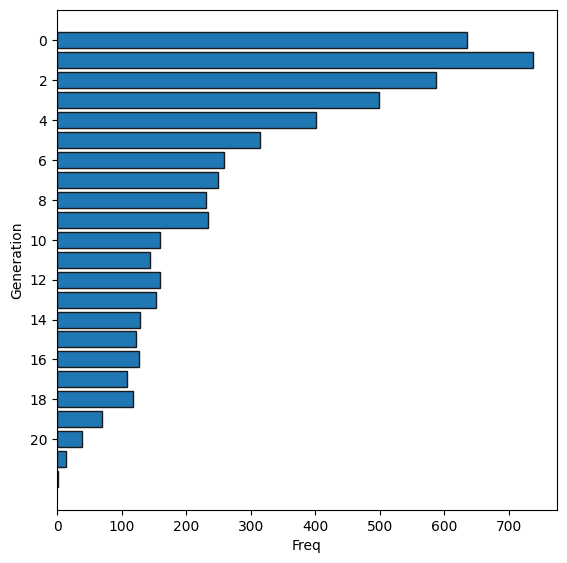

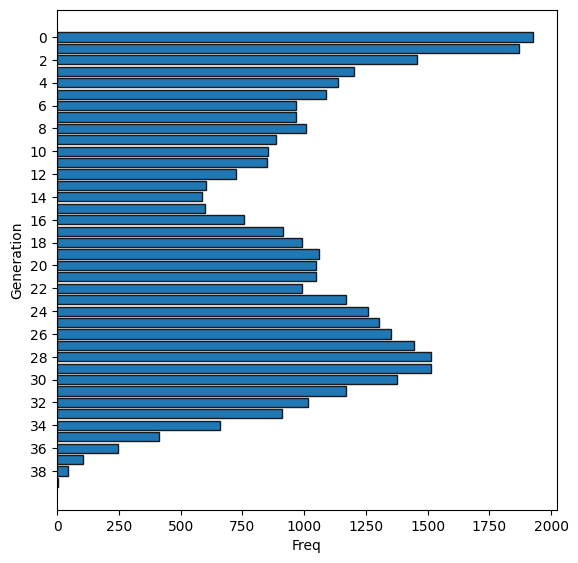

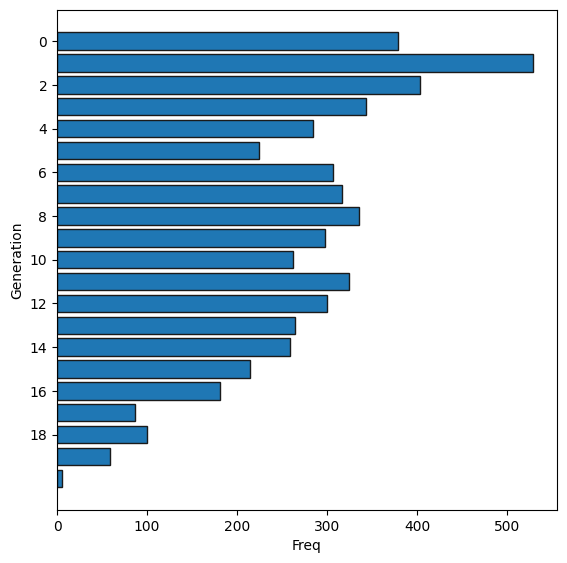

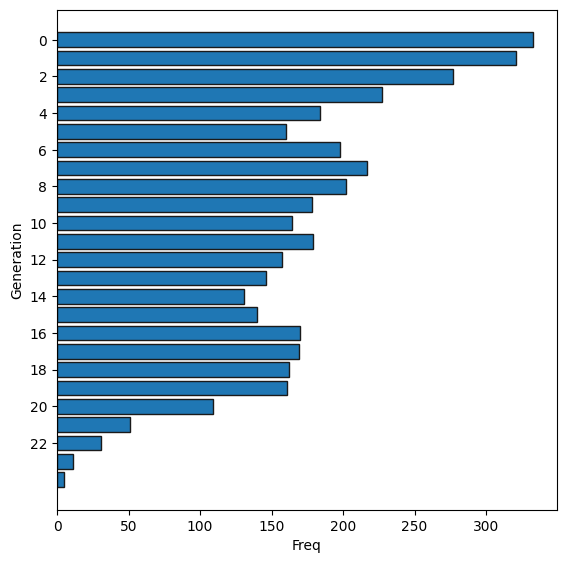

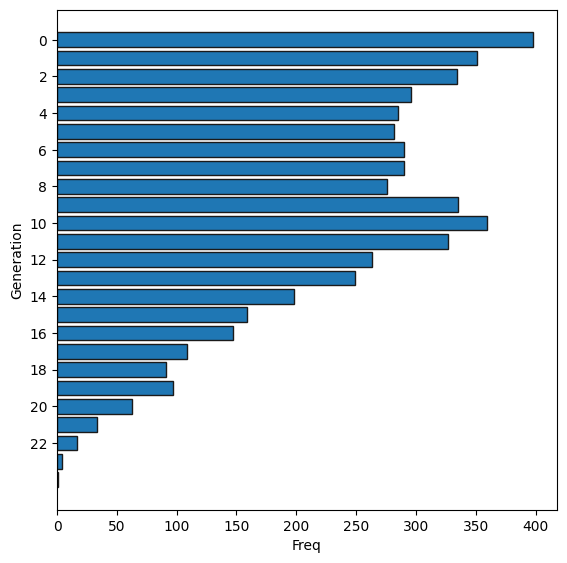

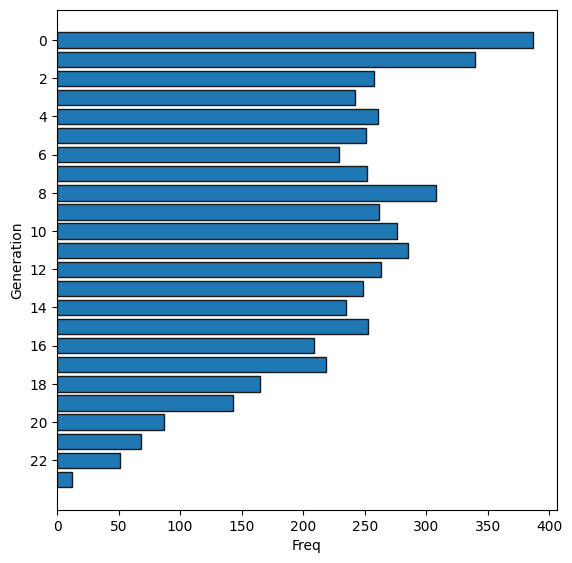

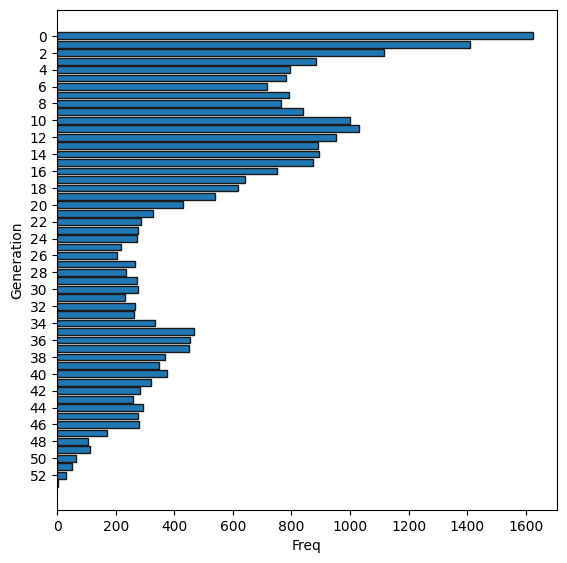

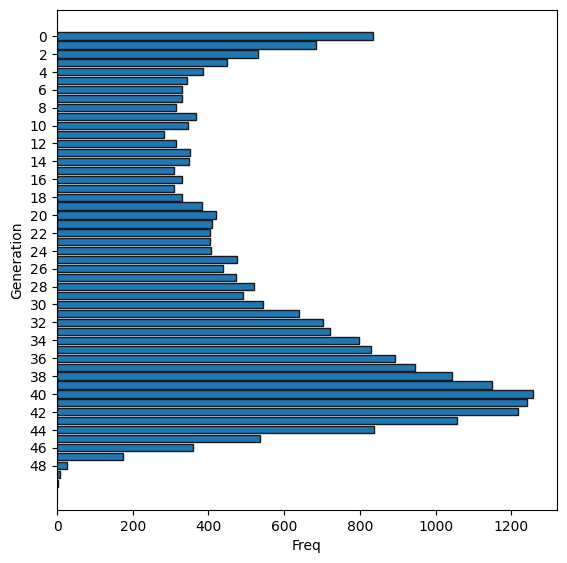

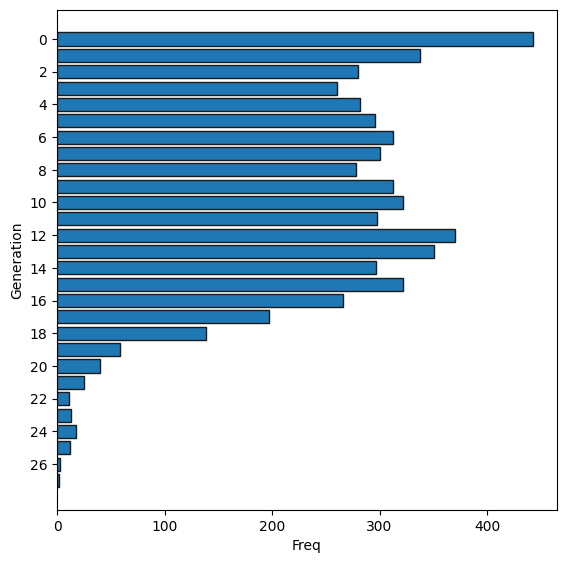

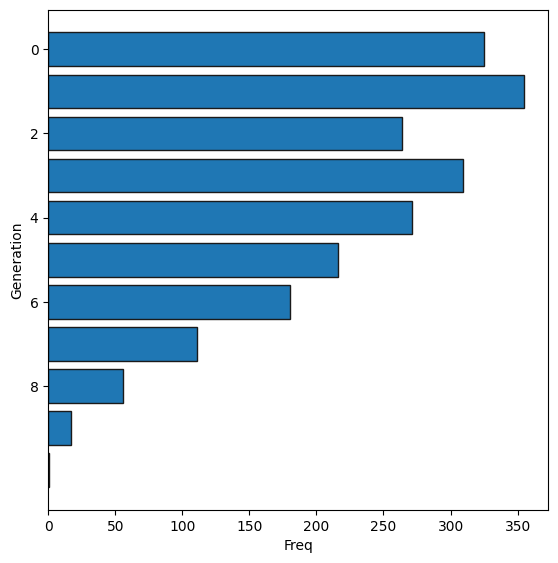

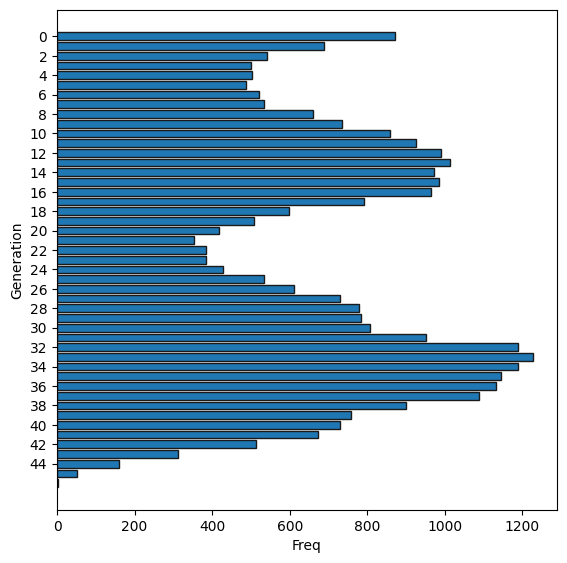

In [13]:
sns.reset_defaults()

for (field_name, corpus) in corpora.items():

    print(field_name)

    G = corpus['G'].reverse()

    num_per_gen = [len(l) for l in nx.topological_generations(G)]
    gens = range(len(num_per_gen))
    
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_axes([0, 0, 1, 1])

    ax.barh(gens, num_per_gen, align='center', edgecolor='k')
    ax.set_yticks(gens, labels=gens)
    ax.invert_yaxis()
    ax.set_xlabel('Freq')
    ax.set_ylabel('Generation')
    
    ax.set_yticks(np.arange(0, max(gens), 2))

    ax.grid(False)
    fig.tight_layout()

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'generational_doc_dist', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150,
        bbox_inches='tight',
    )

# Descendants

In [4]:
field_name = 'Artificial Intelligence'
corpus = corpora[field_name]

df = corpus['Df']
G = corpus['G'].reverse()

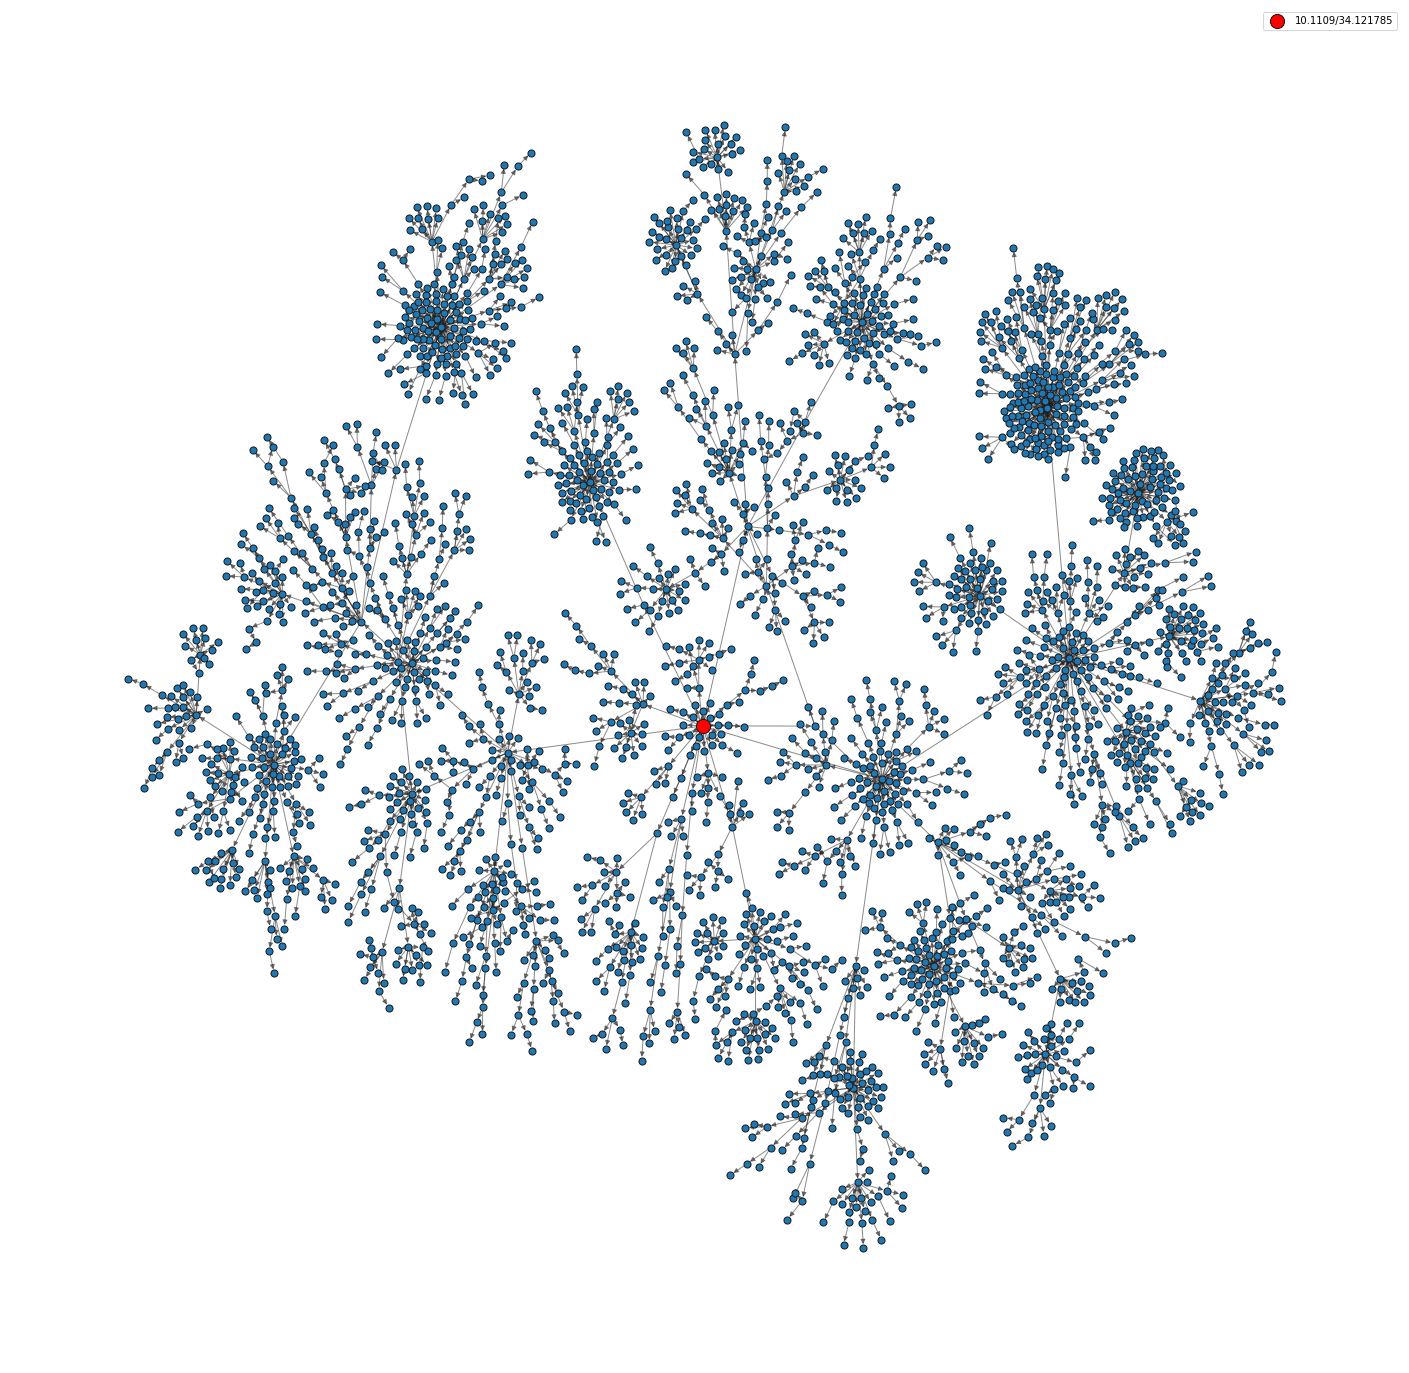

In [5]:
sns.reset_defaults()
cmap = cm.plasma

node_size = 50

roots = [n for n in G.nodes() if G.in_degree(n) == 0]
root = roots[1]

G_genealogy = nx.bfs_tree(G, root)

# pos = nx.nx_agraph.graphviz_layout(G_genealogy, prog="dot") # dot, twopi, fdp, sfdp, circo
pos = nx.nx_agraph.graphviz_layout(G_genealogy, prog="sfdp") # dot, twopi, fdp, sfdp, circo
# pos = nx.nx_agraph.graphviz_layout(G_genealogy, prog="circo") # dot, twopi, fdp, sfdp, circo
# pos = nx.nx_agraph.graphviz_layout(G_genealogy, prog="twopi") # dot, twopi, fdp, sfdp, circo

plt.figure(figsize=(25, 25))

root_node = nx.draw_networkx_nodes(
    G_genealogy, 
    pos, 
    nodelist=[root],
    node_size=200,
    node_color='red',
    node_shape='o',
    alpha=None,
    cmap=None,
    vmin=None,
    vmax=None,
    ax=None,
    linewidths=1.0, 
    edgecolors='k', 
    label=root, 
    margins=None
)
root_node.set_zorder(2)

nodes = nx.draw_networkx_nodes(
    G_genealogy, 
    pos, 
    nodelist=None,
    node_size=node_size,
    # node_color=None,
    node_shape='o',
    alpha=None,
    cmap=cmap,
    vmin=None,
    vmax=None,
    ax=None,
    linewidths=1.0, 
    edgecolors='k', 
    # label=None, 
    margins=None
)
nodes.set_zorder(1)

edges = nx.draw_networkx_edges(
    G_genealogy, 
    pos,
    edgelist=None,
    width=1.0,
    edge_color='k',
    style='solid',
    alpha=0.5,
    arrowstyle=None,
    arrowsize=10,
    edge_cmap=None,
    edge_vmin=None,
    edge_vmax=None,
    ax=None,
    arrows=None,
    label=None,
    node_size=node_size,
    nodelist=None,
    node_shape='o',
    connectionstyle='arc3',
    min_source_margin=0,
    min_target_margin=0,
)

for c in edges:
    c.set_zorder(-1)
# edges.set_zorder(-1)

plt.legend()

plt.grid(False)
plt.box(False)

root = root.replace('/', '-')
plt.savefig(
    os.path.join(LATEX_FIGURES_PATH, 'genealogy_trees', f'{root}.png'), 
    transparent=True, 
    dpi=300,
    bbox_inches='tight',
)